In [40]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [57]:
filepath = 'RES_Rand_SE_100_kroB200.json'

In [58]:
with open(filepath) as json_data:
    d = json.load(json_data)
    json_data.close()

In [59]:
_, method_sign, pick_method, _, _ = filepath.split('_') # Przykładowa ścieżka: RES_NN_SD_100_kroA200

In [60]:
method_sign = "RAND"

In [61]:
X = []
Y = []
for i in d['unordered nodes']:
    X.append(i['X'])
    Y.append(i['Y'])

In [71]:
option = "best order"
match method_sign:
    case "NN":
      method = "Najbliższy Sąsiad"
    case "GC":
      method = "Zachłanny Cykl"
    case "REG":
      method = "Żal"  
    case "RAND":
      method = "Losową"
match option:
    case "best order":
        which_order = "Najlepszy cykl"
    case "worst order":
        which_order = "Najgorszy cykl"
    case _:
        which_order = "unknown"
match pick_method:
    case "SE":
        pick = "Steepest Edge"
    case "SN":
      pick = "Steepest Node"
    case "GE":
      pick =  "Greedy Edge"
    case "GN":
      pick = "Greedy Node"
    case "RW":
      pick = "Random Walk"


In [72]:
cycle1 = d[option][0]
cycle1_base = d["start "+option][0]
cycle2 = d[option][1]
cycle2_base = d["start "+option][1]

In [73]:
f = lambda x: [X[x], Y[x]]

In [74]:
cycle_1 = []
for i in cycle1:
    cycle_1.append(f(i))
cycle_1.append(cycle_1[0])
cycle_2 = []
for i in cycle2:
    cycle_2.append(f(i))
cycle_2.append(cycle_2[0])

In [75]:
cycle_1_base = []
for i in cycle1_base:
    cycle_1_base.append(f(i))
cycle_1_base.append(cycle_1_base[0])
cycle_2_base = []
for i in cycle2_base:
    cycle_2_base.append(f(i))
cycle_2_base.append(cycle_2_base[0])

In [76]:
from numpy.linalg import norm
n = len(d['unordered nodes'])
distance_matrix = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        distance_matrix[i,j] = np.round(norm(np.array([d['unordered nodes'][i]["X"]-d['unordered nodes'][j]["X"],d['unordered nodes'][i]["Y"]-d['unordered nodes'][j]["Y"]])))

In [77]:
def cycle_length(cycle, distance_matrix):
    cost = 0
    for i in range(len(cycle)):
        cost += distance_matrix[cycle[i],cycle[(i+1)%len(cycle)]]
    return int(cost)

In [78]:
cycle1_color = "#df2935"
cycle2_color = "#3772ff"

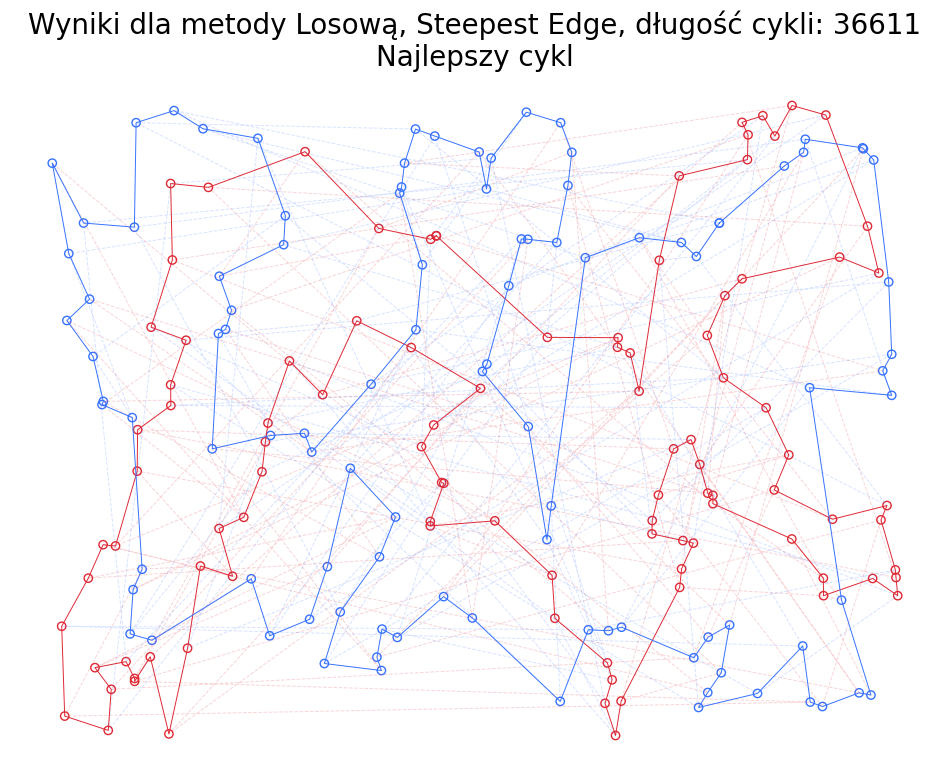

In [79]:
fig, ax = plt.subplots(figsize=(12,9))
plt.plot(np.array(cycle_1_base).T[0],np.array(cycle_1_base).T[1], c=cycle1_color, lw=0.7, linestyle="dashed", alpha=0.2)
plt.plot(np.array(cycle_2_base).T[0],np.array(cycle_2_base).T[1], c=cycle2_color, lw=0.7, linestyle="dashed", alpha=0.2)
plt.scatter(np.array(cycle_1).T[0],np.array(cycle_1).T[1], c="none", edgecolors=cycle1_color)
plt.scatter(np.array(cycle_2).T[0],np.array(cycle_2).T[1], c="none", edgecolors=cycle2_color)
plt.plot(np.array(cycle_1).T[0],np.array(cycle_1).T[1], c=cycle1_color, lw=0.7)
plt.plot(np.array(cycle_2).T[0],np.array(cycle_2).T[1], c=cycle2_color, lw=0.7)
plt.title(f"Wyniki dla metody {method}, {pick}, długość cykli: {cycle_length(cycle1, distance_matrix)+cycle_length(cycle2, distance_matrix)}\n{which_order}", fontsize=20)
nn = plt.axis(False)
fig.savefig(f"{method_sign}_{option}_{pick_method}.png",bbox_inches='tight', pad_inches=0.05)

In [55]:
cost_array = np.array(d['result'][0])+np.array(d['result'][1])
time_array = np.array(d['times'])

In [56]:
print(f"Najmniejsza długość łączna cykli: {np.min(cost_array)}")
print(f"Najdłuższa długość łączna cykli: {np.max(cost_array)}")
print(f"Średnia długość sumy cykli: {np.mean(cost_array)}")
print()
print(f"Najkrótszy czas: {1000*np.min(time_array):.2f} ms")
print(f"Najdłuższy czas: {1000*np.max(time_array):.2f} ms")
print(f"Średni czas: {1000*np.mean(time_array):.2f} ms")

Najmniejsza długość łączna cykli: 36611
Najdłuższa długość łączna cykli: 40709
Średnia długość sumy cykli: 38566.44

Najkrótszy czas: 265.49 ms
Najdłuższy czas: 438.67 ms
Średni czas: 333.97 ms
